In [3]:
import torch
torch.__version__

import numpy as np
import math
import matplotlib.pyplot as plt

### Simple Polynomial Regression using NumPy

Following the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html), we will try to fit $y=\sin(x)$ using the 3rd order polynomial $y = a + bx + cx^2 + dx^3$. The network will have 4 parameters (a,b,c,d), and will be trained using gradient descent to fit random data by minimizing the Euclidean distance between the network output and the true output. We will implement the network using NumPy before introducing PyTorch. 

**Gradients**: Euclidean distance in 2D can be expressed by $d = \sqrt{\left( x_1 - x_2\right)^2 + \left( y_1 - y_2\right)^2}$, and in n-dimensional space, we generalize this to $d(x,y) = \sqrt{\sum_{i=1}^n \left(x_i - y_i\right)^2}$. As gradients indicate the direction of steepest change, the gradient of a loss function points towards the direction where loss increases most rapidly. To train the model, we must minimize the loss function (so predicted y-values are close to actual y-values), and we use  gradients to find which direction to adjust model parameters ($a,b,c,d$). Defining our loss function as 
$$
\mathcal{L} = \sum_{i=1}^n \left(x_i - y_i\right)^2,
$$
we can take the gradient of the loss function with respect to predicted values $x_i$
$$
\nabla \mathcal{L} = \frac{\partial}{\partial x_i} \sum_{i=1}^n \left(x_i - y_i\right)^2 = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot \frac{\partial}{\partial x_i} \left(x_i - y_i\right) ,
$$
$$
\nabla \mathcal{L} = 2 \sum_{i=1}^n \left(x_i - y_i\right)
$$

**Chain Rule**: To carry out backpropogation is to answer the question: "If I slightly tweak this parameter, how will my error change?" To understand how changing one variable (parameter) affects the outcome of the function (loss), we must apply the chain rule: 
$$
\frac{\partial \mathcal{L}}{\partial x_i} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial x_i}
$$

$$
y_{pred} = a + bx + cx^2 + dx^3 \rightarrow \begin{cases}
\frac{\partial y_{pred}}{\partial a} = 1\\
\frac{\partial y_{pred}}{\partial b} = x \\
\frac{\partial y_{pred}}{\partial c} = x^2 \\
\frac{\partial y_{pred}}{\partial d} = x^3 \\
\end{cases}
$$

We can now calculate gradients for each parameter:

$$
\frac{\partial \mathcal{L}}{\partial a} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial a} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot 1
$$
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial b} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x
$$
$$
\frac{\partial \mathcal{L}}{\partial c} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial c} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x^2
$$
$$
\frac{\partial \mathcal{L}}{\partial d} = \frac{\partial \mathcal{L}}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial d} = 2 \sum_{i=1}^n \left(x_i - y_i\right) \cdot x^3
$$
A positive gradient means that increasing the parameter will increase the loss, and a larger gradient means a change to that parameter will have a larger impact on the loss. We can now update parameters through these gradients and a fixed learning rate (small positive integer), as iteratively calculating gradients at each step allows parameters to "learn" by adjusting themselves to minimize loss. 

0 69055.03579472119
100 215.8768520350539
200 148.2925043942331
300 102.85495901426708
400 72.28031487777096
500 51.688435350796105
600 37.80711241119648
700 28.440600102879113
800 22.11431765739414
900 17.83717462429307
1000 14.94247307072184
1100 12.9813346467288
1200 11.651260092299552
1300 10.748203397115123
1400 10.13439552041194
1500 9.716724388906357
1600 9.432195636346801
1700 9.23814653374007
1800 9.105653245833913
1900 9.015085254611355
Result: y = -0.00931855895834529 + 0.8642041704847749x + 0.0016076064818049455x^2 + -0.09439198237358534x^3


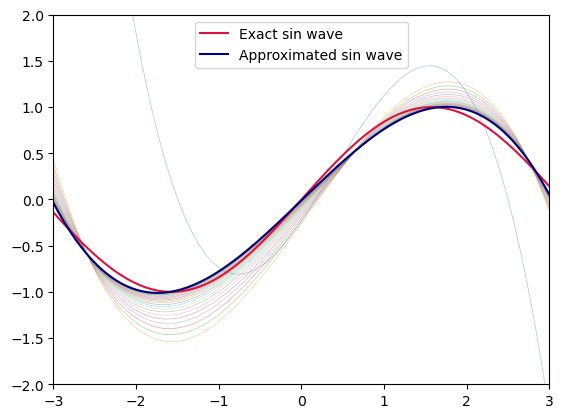

In [89]:
def result(x,a,b,c,d): return a + b * x + c * x ** 2 + d * x ** 3

x = np.linspace(-math.pi, math.pi, 2000)             # Create a sin wave, represented by y
y = np.sin(x)

a = np.random.randn()                                # Randomly initialize weights                     
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6                                 
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3     # Forward pass: compute predicted y
    
    loss = np.square(y_pred - y).sum()               # Compute and print loss (Euclidean distance)
    if t % 100 == 0:
        print(t, loss)
                                                     
    grad_y_pred = 2 * (y_pred - y)                   # Backpropogation to compute gradients of parameters w/ respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    a -= learning_rate * grad_a                      # Updating parameters
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
    if t % 75 == 0:
        y_running = result(x,a,b,c,d)
        plt.plot(x,y_running, alpha = 0.4, linewidth=0.5)

print(f'Result: y = {a} + {b}x + {c}x^2 + {d}x^3')    

y_approx = result(x,a,b,c,d)

plt.plot(x,y, c = "crimson", label = "Exact sin wave")
plt.plot(x,y_approx, c = "navy", label = "Approximated sin wave")
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.legend()
plt.show()